<div style="border:solid green 2px; padding: 20px">

<b>Привет, Айбек!</b>

Меня зовут Ярослав П. и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Предлагаю общаться на «**ты**». Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на «**вы**».

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span><a class="tocSkip">

- Проект выполнен на высоком уровне.
- Это только начало моделирования, но ты уже делаешь успехи.
- Хорошо реализован подбор гиперпараметров и тестирование моделей.
- Один момент - проверка на мультиколлинеарность. Оставил комментарий.
    
### <span style="color:orange">Обратная связь (v2)</span><a class="tocSkip">

- Проект отлично доработан, спасибо за уделенное время!
    
Проект принят, успехов в дальнейшем обучении!

# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличное введение.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Также в начале полезно дать описание данных, с которыми предстоит работа и содержание/шаги проекта.

</div>

## Откройте и изучите файл

Подключим все необходимые нам библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


is_ultra 1 - у клиента подключен тариф "Ультра", is_ultra 0 - у клиента подключен тариф "Смарт"

In [3]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропущенных значений нет

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Хороший первый взгляд на данные. Молодец, что изучил таблицу на предмет аномальных значений.

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Также прошу оценить мультиколлинеарность признаков (когда признаки модели имеют сильную связь друг с другом). Стоит найти коффиценты корреляции, построить график скатерплот. После этого нужно принять решение о включении в модель одного из признаков. В общем случае такие признаки лишь мешают друг другу и утяжеляют модель.  Здесь стоит экспериментировать (эксперименты - основа нашего дата саентского дела 😉). Если же модели дают одинаковые результаты что с двумя признаками (calls и minutes), что с одним из них, то тогда точно стоит один из них дропнуть. Меньше признаков - легче модель, быстрее обучается, быстрее предсказывает, что всегда хорошо.

</div>


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Согласен с вашим комментарием. Ниже построил матрицу корреляции и видно, что минуты и звонки имеют высокую корреляцию, а также одинкаково коррелируют с другими признаками. Отсюда вытекает вывод - дропаем колонку minutes. 

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Здорово.

</div>


             calls   minutes  messages   mb_used  is_ultra
calls     1.000000  0.982083  0.177385  0.286442  0.207122
minutes   0.982083  1.000000  0.173110  0.280967  0.206955
messages  0.177385  0.173110  1.000000  0.195721  0.203830
mb_used   0.286442  0.280967  0.195721  1.000000  0.198568
is_ultra  0.207122  0.206955  0.203830  0.198568  1.000000


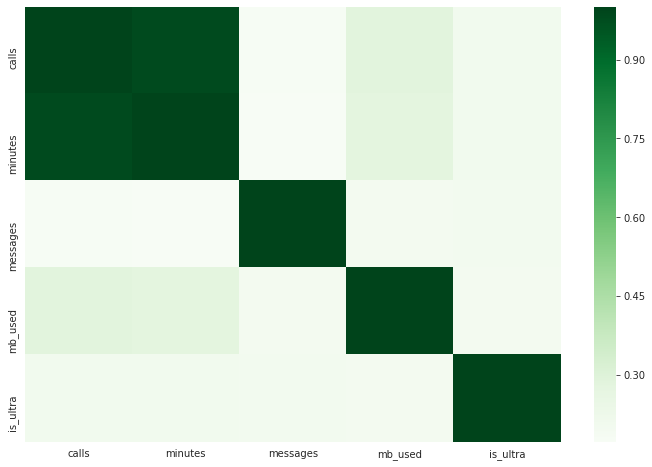

In [5]:
corr = df.corr()
kot = corr[corr>=.1]
print(corr)
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

## Разбейте данные на выборки

Разделим датасет на выборки

In [6]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_valid,test_size = 0.5, random_state=12345)
print('Размер обучающей выборки:', df_train.shape[0])
print('Размер валидационной выборки:', df_valid.shape[0])
print('Размер тестовой выборки:',df_test.shape[0])

Размер обучающей выборки: 1928
Размер валидационной выборки: 643
Размер тестовой выборки: 643


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Хорошо, данные разделены. Молодец, что проконтролировал размеры выборок.

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Только разбиение получилось не 3:1:1.

</div>


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Перераспределил разбивку выборок

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


## Исследуйте модели

Валидационная выборка

In [7]:
valid_features = df_valid.drop(['is_ultra', 'minutes'], axis=1)
valid_target = df_valid['is_ultra']

Обучающая выборка

In [8]:
train_features = df_train.drop(['is_ultra', 'minutes'], axis=1)
train_target = df_train['is_ultra']

Тестовая выборка

In [9]:
test_features = df_test.drop(['is_ultra', 'minutes'], axis=1)
test_target = df_test['is_ultra']

Таблица для записи accuracy всех моделей(понадобится после обучения на всех моделях)

In [10]:
columns=['DecisionTree','RandomForest','KNeighbors']
data = pd.DataFrame(columns=columns)

Создаем функцию для обучения по всем необходимым моделям

In [11]:
def train_model(model_name, x, start, stop, step):
    values = []
    accuracies = []
    plt.figure(figsize=(10, 5))
        
    for value in range(start, stop, step):
        if model_name == "DecisionTree":
            model = DecisionTreeClassifier(random_state=12345, max_depth=value)
        if model_name == "KNeighbors":
            model = KNeighborsClassifier(n_neighbors = value)
        model.fit(train_features,train_target)
        predictions = model.predict(valid_features)
        score = accuracy_score(valid_target, predictions)
        values.append(value)
        accuracies.append(score)
        print(x, value, end='')
        print('       Accuracy:', score)
        sns.lineplot(data=pd.DataFrame(data=accuracies, index=values),dashes=False)
        plt.legend('')
    data[model_name] = accuracies
    print('\n')
    plt.title("Выберем лучшую accuracy при разных " + x, fontsize=15) 
    plt.ylabel("Accuracies") 
    plt.xlabel(x)
    plt.show()
    print('\n\n')

Обучение по модели дерева решений

Depth 1       Accuracy: 0.7542768273716952
Depth 2       Accuracy: 0.7838258164852255
Depth 3       Accuracy: 0.7869362363919129
Depth 4       Accuracy: 0.7853810264385692
Depth 5       Accuracy: 0.7900466562986003
Depth 6       Accuracy: 0.7776049766718507
Depth 7       Accuracy: 0.776049766718507
Depth 8       Accuracy: 0.7729393468118196
Depth 9       Accuracy: 0.7822706065318819




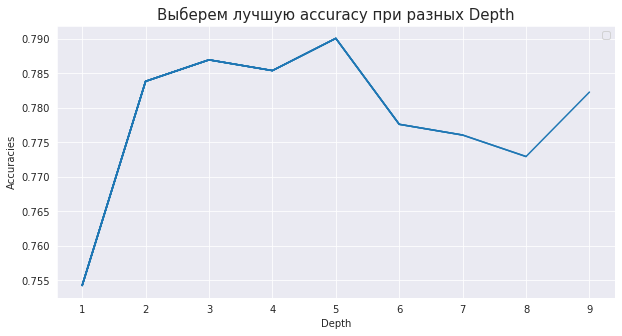

In [12]:
train_model("DecisionTree", "Depth", 1, 10, 1)

Обучение по модели случайного леса

Estimators 10       Accuracy: 0.7947122861586314   Depth: 6
Estimators 15       Accuracy: 0.7916018662519441   Depth: 6
Estimators 20       Accuracy: 0.7916018662519441   Depth: 6
Estimators 25       Accuracy: 0.7931570762052877   Depth: 9
Estimators 30       Accuracy: 0.7962674961119751   Depth: 6
Estimators 35       Accuracy: 0.7916018662519441   Depth: 6
Estimators 40       Accuracy: 0.7931570762052877   Depth: 6
Estimators 45       Accuracy: 0.7916018662519441   Depth: 6
Estimators 50       Accuracy: 0.7900466562986003   Depth: 8




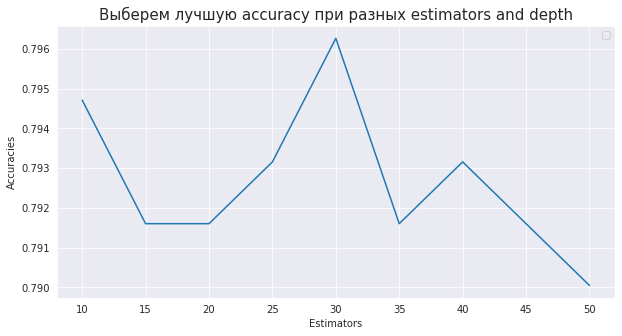

In [13]:
#train_model("RandomForest", "Estimators", 10, 51, 5)
values = []
accuracies = []
plt.figure(figsize=(10, 5))
for value in range(10, 51, 5):
    max_score=0
    for depth in range(1,10,1):
        model = RandomForestClassifier(random_state=12345, n_estimators=value, max_depth=depth)
        model.fit(train_features,train_target)
        predictions = model.predict(valid_features)
        score = accuracy_score(valid_target, predictions)
        if score > max_score:
            max_score = score
            max_score_value = value
            max_score_depth = depth
    values.append(max_score_value)
    accuracies.append(max_score)
    print('Estimators', max_score_value, end='')
    print('       Accuracy:', max_score, end='')
    print('   Depth:', max_score_depth)
#accuracies.sort()
sns.lineplot(data=pd.DataFrame(data=accuracies, index=values),dashes=False)
plt.legend('')
data['RandomForest'] = accuracies
print('\n')
plt.title("Выберем лучшую accuracy при разных estimators and depth", fontsize=15) 
plt.ylabel("Accuracies") 
plt.xlabel("Estimators")
plt.show()
print('\n\n')

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

У леса также стоит попробовать подобрать глубину, то есть пройтись двойным циклом.

</div>


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Как видно выше, добавил второй цикл по параметру depth, что дало результаты лучше.

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Отлично, вижу.

</div>


Обучение по модели ближайших соседей

neighbors 1       Accuracy: 0.6889580093312597
neighbors 4       Accuracy: 0.7527216174183515
neighbors 7       Accuracy: 0.7293934681181959
neighbors 10       Accuracy: 0.7511664074650077
neighbors 13       Accuracy: 0.7511664074650077
neighbors 16       Accuracy: 0.7480559875583204
neighbors 19       Accuracy: 0.749611197511664
neighbors 22       Accuracy: 0.7542768273716952
neighbors 25       Accuracy: 0.744945567651633




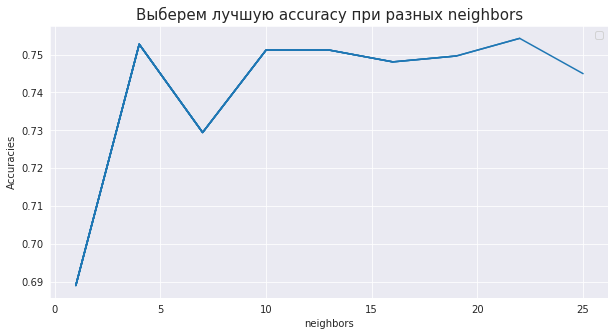

In [14]:
train_model("KNeighbors", "neighbors", 1, 28, 3)

Отрисуем график, чтобы наглядно увидеть, какая модель нас больше устраивает

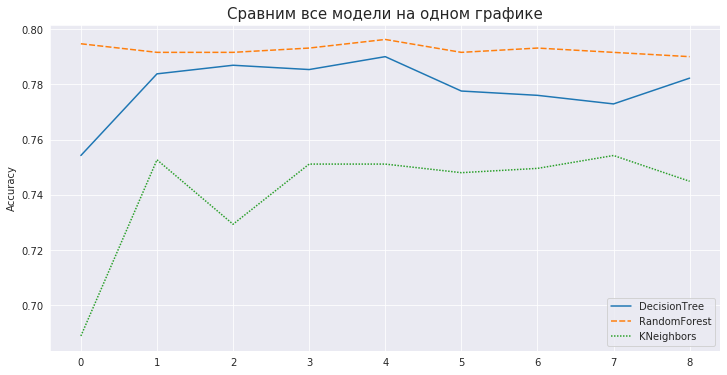

In [15]:
plt.figure(figsize=(12,6))
plt.title('Сравним все модели на одном графике', fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data=data)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Полезный график, молодец.

</div>


Вывод:
- Использовали три модели: Случайный лес, Дерево решений, Ближайшие соседи
- Резульаты: 
    - Дерево решений - при 5 деревьях accuracy: 0.7900466562986003
    - Ближайште соседи - при 22 соседях accuracy: 0.7542768273716952
    - Случайный лес - при 30 деревьях и depth=6, accuracy: 0.7962674961119751
- Лучший результат показала модель случайного леса при 30 деревьях accuracy 0.7962674961119751

Несомненно, удаление одной колонки(minutes) оказало положительное влияние на значение accuracy 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Все круто, шаг выполнен отлично. Молодец, что попробовал разные модели.

</div>


## Проверьте модель на тестовой выборке

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Небольшой совет. Мы нашли лучшие параметры для наших моделей на валидационной выборке. Теперь стоит с найдеными параметрами обучить модели на выборке трейн+валид, и потом прогнать на тесте. Так показания должны улучшиться (но не факт 😉), так как наши модели обучатся на большем количестве данных.

Логика такая. В нашем случае у нас не было отдельного датасета для тестирования, мы отрезали от основного небольшую часть (отложенная выборка). То есть остальные данные мы используем для обучения. Если обучить только на обучающей, что у нас полностью теряются валидационные данные - мы их не используем в модели, но они то у нас есть, жаль их выбрасывать.

</div>


Проверим модель: Случайный лес на тестовой выборке при 30 деревьях и глубине 6

In [16]:
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=6)
model.fit(train_features,train_target)
predictions = model.predict(test_features)
score = accuracy_score(test_target, predictions)
print('Accuracy:', score)

Accuracy: 0.7900466562986003


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Как видно выше, результат лучше, чем в прошлый раз (было 0.78)

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Один процент - это очень неплохо.

</div>


In [17]:
final_train_f = train_features.append(valid_features)
final_train_t = train_target.append(valid_target)

In [18]:
model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=6)
model.fit(final_train_f,final_train_t)
predictions = model.predict(test_features)
score = accuracy_score(test_target, predictions)
print('Accuracy:', score)

Accuracy: 0.7978227060653188


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Согласно вашему комментарию, переобучил модель на трейн+валид и прогнал на тесте, результат улучшился еще чуть-чуть

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

А здесь уже прирост незначительный, но, в целом, тоже есть :)

</div>


In [19]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=9)
model.fit(final_train_f,final_train_t)
predictions = model.predict(test_features)
score = accuracy_score(test_target, predictions)
print('Accuracy:', score)

Accuracy: 0.8102643856920684


<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Изначально, я перебирал depth, где количество деревьев было равно 40, чтобы посмотреть иммет ли смысл переделывать. При таких параметрах, где кол-во деревьев 40 и глубина 9, accuracy поднимается до 0.8102643856920684. Возможно, имея больший датасет, мы бы приши к этому при обучении на обучающей выборке или пропорции нужно было взять другие. 

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Да, вполне возможно. Но это трудно предсказать.

</div>


При обучении модели на тестовой выборке, модель показала результат accuracy 0.8102643856920684

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличный результат.

</div>


## (бонус) Проверьте модели на адекватность

Модель показала результат 0.81 - это значит, что модель адекватная и не предсказывает случайным образом

In [20]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Пусть наша модель всегда будет предсказывать тариф «Смарт». Тогда точность модели будет равна примерно 69%, но точность нашей лучшей модели больше и равна 81%. Можем заключить, что проверка на адекватность пройдена успешно!

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Ты отлично разобрался с проверкой на адекватность, молодец. <br> Также проверку на адекватность можно реализовывать с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html"> DummyClassifier </a>. 

</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Также было бы здорово оставить общий вывод - что было сделано, какие модели испытаны, какие результаты получили.

</div>


**Общий вывод**
- Проанализировал данные
    - Пустых значений нет
    - Построил матрицу корреляции и убрал колонку minutes из датасета
- Разделил данные на трейн, валид и тест
- Обучил модели Случайным лесом, Деревом решений и методом ближайших соседей
- К каждой модели подбирал параметры
- Лучшей моделью, подходящей для данного случая, оказалась Случайный лес с 30 деревьями и глубиной 6 (согласно трейн выборке), где accuracy составил 0.7900466562986003 на тестовой выборке
- При таких же параметрах, но с выборкой трейн+валид, модель показала accuracy 0.7978227060653188 на тестовой выборке
- При 40 деревьях и depth=9 и выборки трейн+валид , accuracy достигает 0.8102643856920684 на тестовой выборке - но это требует дальнейшего изучения 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
